In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy import stats 
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples = 10000, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2019)

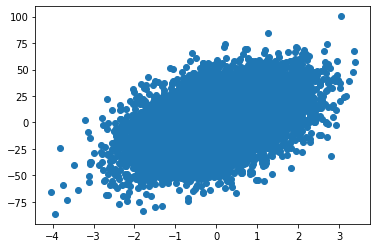

In [ ]:
plt.scatter(X,y)

In [ ]:
x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)
print (slope)
print (intercept)

10.650659469662918
0.2873381752645907


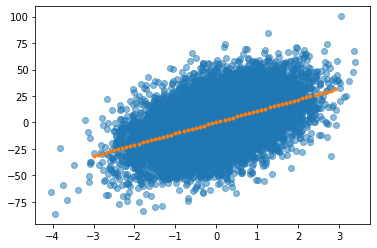

In [ ]:
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

In [ ]:
y = y.reshape(-1,1)

In [ ]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [ ]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [ ]:
# mini batch gradient descent 
@timeit
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01, iterations=10, batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            X_i = np.c_[np.ones(len(X_i)),X_i]
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
    return theta, cost_history


In [ ]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

'minibatch_gradient_descent'  25662.86 ms
Theta0:          0.288,
Theta1:          10.650
Final cost/MSE:  39820329.940


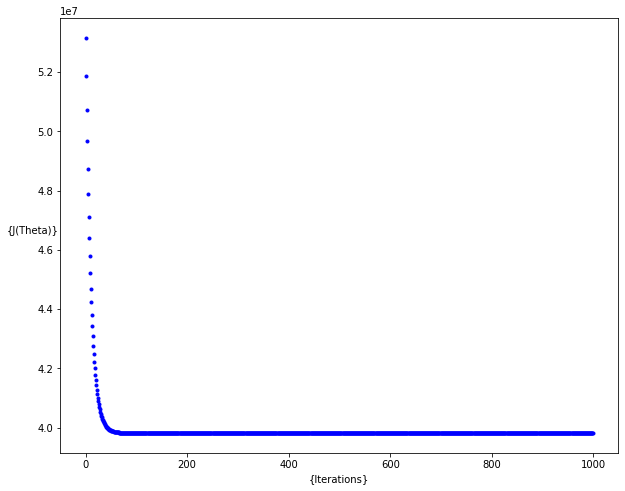

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")

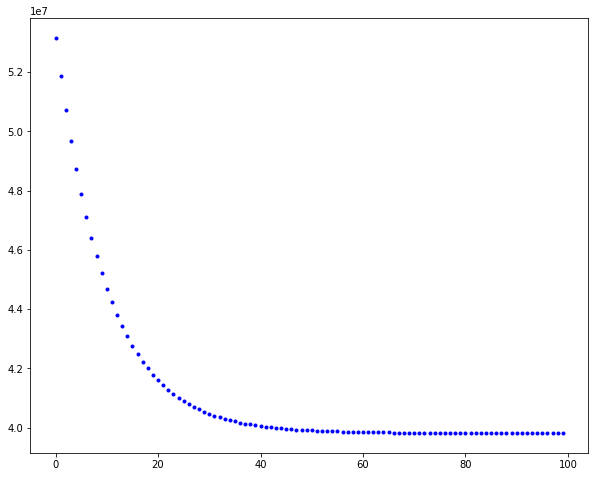

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(100),cost_history[:100],'b.')

In [ ]:
# autoencoder
# https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f


# CIFAR - 10
# https://www.kaggle.com/c/cifar-10


# image compression using pca 
# https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
# https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f


# image compression using SVD
# https://medium.com/balabit-unsupervised/image-compression-using-singular-value-decomposition-de20451c69a3
# https://github.com/sidneyouteiro/Image-Compression-using-SVD/blob/master/SVD.ipynb